# Outliers- Steve

## Adult Data Analysis

Next we'll work with a dataset described in Chapter 3 of the text - the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset:

> "hosted on the UCI’s Machine Learning Repository.1 It contains approximately 32,000 observations concerning different financial parameters related to the US population: age, sex, marital (marital status of the individual), country, income (Boolean variable: whether the person makes more than $50,000 per annum), education (the highest level of education achieved by the individual), occupation, capital gain, etc.

The data is stored in a file 'files/adult.data' in this repository. It is in CSV format but the text uses a
different method to read it in to a dataframe - the reason is that it is a slightly non-standard format with spaces after the commas.  I've shown an alternate way to read the data below that uses read_csv with appropriate arguments to read the data.  This ensures that it doesn't try to read a header line (since there isn't one) and skips initial spaces in values.  We explicitly set the column names from a list of strings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
column_names = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 
                'marital', 'occupation',' relationship', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hr_per_week', 'country', 'income']

adult = pd.read_csv('adult.data', header=None, names=column_names, skipinitialspace=True)
adult.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Follow the textbook examples to complete the tasks below.  Note that cutting and pasting from the text
is a bit problematic since they use special quote character in the code - if you try to copy-paste the code you'll get syntax errors. Instead, type out the commands, it might help you remember them better too.

The first task is to create separate dataframes for males and females, and for males and females earning over 50K (four dataframes in all).  When you have done this, **display the mean, median and standard deviation of age for each group** (Section 3.3.1).

One criticism I have of the code in the text is that they use very short variable names like df and ml2.  I've called the main dataframe `adult`; I suggest you use slightly longer varible names (`males`, `males_high`) to make your code easier to read - although avoid really long names (`males_with_high_income`) as they can make your code hard to read.

## creating separate dataframes for males and females, and for males and females earning over 50K (four dataframes in all)

In [5]:
males=adult[adult['sex']=='Male']
females=adult[adult['sex']=='Female']
males_high=males[males['income']==">50K"]
females_high=females[females['income']==">50K"]
print("Standard deviation of males is: ",males.std())
print("Standard deviation of females is: ",females.std())
print("Standard deviation of males_high is: ",males_high.std())
print("Standard deviation of females_high is: ",females_high.std())

Standard deviation of males is:  age                  13.370630
fnlwgt           106740.702676
education_num         2.662630
capital_gain       8326.312095
capital_loss        429.763097
hr_per_week          12.119755
dtype: float64
Standard deviation of females is:  age                  14.013697
fnlwgt           102986.078821
education_num         2.379954
capital_gain       4924.262944
capital_loss        340.907518
hr_per_week          11.811300
dtype: float64
Standard deviation of males_high is:  age                  10.485469
fnlwgt           103107.315990
education_num         2.408706
capital_gain      14640.362450
capital_loss        598.709469
hr_per_week          10.729019
dtype: float64
Standard deviation of females_high is:  age                 10.460104
fnlwgt           99217.678731
education_num        2.240158
capital_gain     14172.945728
capital_loss       576.726339
hr_per_week         11.238290
dtype: float64


## displaying number of rows and columns of separate dataframes for males and females, and for males and females earning over 50K

In [6]:
print(males.shape)
print(females.shape)
print(males_high.shape)
print(females_high.shape)

(21790, 15)
(10771, 15)
(6662, 15)
(1179, 15)


# displaying the mean, median and standard deviation of age for males and females

In [7]:
print("stats of males and females age data")
print("male: mean: {}, median: {} std: {}".format(males.age.mean(),males.age.median(),males.age.std()))
print("female: mean: {}, median: {} std: {}".format(females.age.mean(),females.age.median(),females.age.std()))

stats of males and females age data
male: mean: 39.43354749885268, median: 38.0 std: 13.37063019252649
female: mean: 36.85823043357163, median: 35.0 std: 14.01369709943824


# displaying the mean, median and standard deviation of age for females earning over 50K

In [8]:
print("females_high: mean: {}, median: {} std: {}".format(females_high.age.mean(),females_high.age.median(),females_high.age.std()))

females_high: mean: 42.125530110262936, median: 41.0 std: 10.460103747601886


# displaying the mean, median and standard deviation of age for males earning over 50K

In [9]:
print("males_high: mean: {}, median: {} std: {}".format(males_high.age.mean(),males_high.age.median(),males_high.age.std()))

males_high: mean: 44.62578805163614, median: 44.0 std: 10.485469314658651


Plot the distributions of the ages of males and females in the dataset on a single graph (Section 3.3.2 figure 3.2).  Note that you can do without using the seaborn module as in the example, just use `color='indianred'` instead.  Work out ([from the pandas documentation](http://pandas.pydata.org/pandas-docs/)) how to add labels to the axes in your plot - the code in the chapter doesn't show this.

Compare your plot with the plot in the textbook.  Does it look the same? If it does, then you made the same error as they did. Compare the y-axis in Figures 3.1 and 3.2 (left) for Males; how many males are aged around 30? 

**This week's checkpoint is to identify the bug in the textbook code.  Tell your tutor when you've found it.**

Text(0, 0.5, 'frequency')

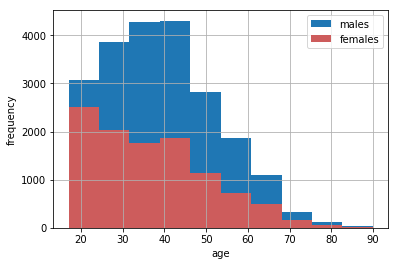

In [11]:
males.age.hist(bins=10, label="males")
females.age.hist(bins=10, color='indianred', alpha=1, label="females")
plt.legend()
plt.xlabel("age")
plt.ylabel("frequency")

## Outliers

The text book Section 3.3.3 talks about removing outliers from the data, discarding values that lie a long way from the median or mean value.   For this dataset, they talk about removing any rows where the income is >50K but the age is below 22 or above 72 - basically saying that these values are unlikely to be real.   This is a reasonable thing to do but the code they give for it is buggy.  

They show this formula:

```
df2 = df.drop(df.index[
                      (df.income == ’>50K\n’) &
                      (df[’age’] > df[’age’].median() + 35) & (df[’age’] > df[’age’].median() -15)
])
```

Note that they are dropping from the dataframe `df` any rows where the income is high AND the age is greater than 72 (median + 35) AND the age is greater than 22 (median - 15).   So effectively the last term will have no effect.  
What they really mean is (age > 72) OR (age < 22).  Here are some expressions that express these constraints. I've printed the length of the dataframe after using the boolean expression to select the rows:

In [13]:
print( len( adult[(adult.income == '>50K')] ))
print( len( adult[(adult.age > 72)] ))
print( len( adult[(adult.age < 22)] ))
print( len( adult[(adult.income == '>50K')  & ((adult.age > 72) | (adult.age < 22))] ))

7841
401
3130
74


Based on these expressions, we can drop rows outside of the target range using the `drop` method as in the textbook.  Note the use of `adult.index`.  The argument to drop is a series giving the indexes of the rows we want to remove from the dataframe.   So we filter the index of the dataframe using the boolean expression to get this.

In [14]:
# remove outliers - people with high income who are too old or too young
adult_clean = adult.drop( adult.index[(adult.income == '>50K') & 
                                      ((adult['age'] > 72) | 
                                       (adult['age'] < 22))]
                        )

# confirm that we have restricted the range of ages for high earners, should see 
adult_clean[adult_clean.income=='>50K'].age.describe()

count    7767.000000
mean       43.965495
std        10.044728
min        22.000000
25%        36.000000
50%        43.000000
75%        51.000000
max        72.000000
Name: age, dtype: float64

Note that unlike in the textbook, the minimum age is now 22 (not 19).

Given this filtered dataset, repeat the analysis in the remainder of section 3.3.3 to **determine whether the difference between males and females is changed once outliers are removed**. To do this you will need to compute versions of the male and female high earners age series with and without outliers removed.  You can do this directly from the `adult` and `adult_clean` dataframes.

In [15]:
males=adult_clean[adult_clean["sex"]=='Male']
females=adult_clean[adult_clean["sex"]=='Female']
males_high=males[males.income==">50K"]
females_high=females[females.income==">50K"]

print(males.shape)
print(females.shape)
print(males_high.shape)
print(females_high.shape)

(21727, 15)
(10760, 15)
(6599, 15)
(1168, 15)


In [16]:
print("males: mean: {}, median: {} std: {}".format(males.age.mean(),males.age.median(),males.age.std()))
print("females: mean: {}, median: {} std: {}".format(females.age.mean(),females.age.median(),females.age.std()))
print("females_high: mean: {}, median: {} std: {}".format(females_high.age.mean(),females_high.age.median(),females_high.age.std()))
print("males_high: mean: {}, median: {} std: {}".format(males_high.age.mean(),males_high.age.median(),males_high.age.std()))

males: mean: 39.327242601371566, median: 38.0 std: 13.22944424473595
females: mean: 36.83187732342007, median: 35.0 std: 13.970787529001642
females_high: mean: 41.93236301369863, median: 41.0 std: 9.989525648849213
males_high: mean: 44.325352326110014, median: 44.0 std: 10.012302742491952


Generate figure 3.5 from the textbook that shows the relative frequency of male an female high earners as a function of age.  Again, label your axes and the plot overall.

/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


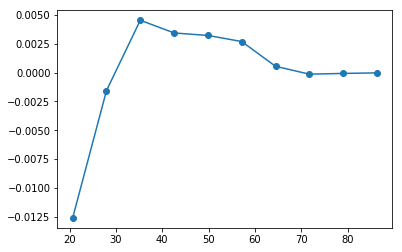

In [17]:
countx, divisionx = np.histogram( males.age , normed =True)
county, divisiony = np.histogram( females.age , normed =True)
val = [(divisionx[i] + divisionx[i+1])/2
for i in range ( len(divisionx) - 1)]
plt.plot(val , countx - county , 'o-')

Finally, use the **Pearson’s median skewness coefficient** from Section 3.3.4 to confirm the difference in the shape of the distribution of male and female age distributions. 

In [18]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= ( len(x) * s * s * s)
    return res
print ("Skewness of the male population = ", skewness(males.age))
print ("Skewness of the female population = ", skewness(females.age))

Skewness of the male population =  0.4898693428021732
Skewness of the female population =  0.6704381665396546


Summarise the results of your analysis. Do you reach the same conclusion as the textbook? What if any differences do you observe with the correct removal of outliers?

## your analysis here

## Challenge

If you complete this work in plenty of time, explore the dataset a little more to 
familiarise yourself with some other features of Pandas dataframes. Example questions might be:

- does education level have an effect on income? Use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to look at the different values of the education variable and the number
of records in each group.  Select one or two groups and compare the low and high income bands for these. 
- The `education_num` column is (I think) a numerical measure of the level of education of the person - higher for a higher level of qualification.  Look at the difference in this variable for groups defined by the `marital` variable: are married people more or less highly educated than those who are single?

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Outliers- Mine

## First, check the outliers with the help of Boxplot

## Removing Outliers
Now that we have the data filled and in our required state we need to make the data consistent by removing any outliers; for this we would define an upper and lower boundary for determining the outliers and removing them.
We would only apply the above methodology to specific set of columns for each data set that would be later used for analysis and predictions.
The following function would be called to remove any outliers from a specific column of a specific data frame:

In [ ]:
def remove_traffic_outliers(data_frame,col_name):
    q1=np.percentile(data_frame[col_name],25)
    q2=np.percentile(data_frame[col_name],50)
    q3=np.percentile(data_frame[col_name],75)
    iqr=q3-q1
    upper_whisker=q3+1.5*iqr
    lower_whisker=q1-1.5*iqr
    data_frame=data_frame[data_frame[col_name]<upper_whisker]

Now, we will define the columns of dataset where outliers are present & we want to remove them.

In [ ]:
Opal_data_columns=['Adult', 'Adult Single Bus Trip 1', 'Adult Single Bus Trip 2', 'Adult Single Bus Trip 3', 'Child/Youth', 'Child/Youth Single Bus Trip 1', 'Child/Youth Single Bus Trip 2', 'Child/Youth Single Bus Trip 3']
Pedestrian_traffic_columns=['Count-Macquarie Walk 3','Count-Macquarie Dr 5','Count-Macquarie Dr 15','Count-Macquarie Dr 71']
Climate_columns=['Maximum temperature (°C)', 'Minimum temperature (°C)', 'Rainfall (mm)', 'Sunshine (hours)']

In [ ]:
for columns in Opal_data_columns:
    remove_traffic_outliers(Opal_data,columns)
for columns in Pedestrian_traffic_columns:
    remove_traffic_outliers(traffic_month,columns)
for columns in Climate_columns:
    remove_traffic_outliers(climate,columns)

Now that the data has been made consistent we can take the columns as we desire and perform analysis accordingly.

## Finally, check that the outliers are removed or not with the help of Boxplot